In [16]:
import numpy as np
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt
import os

# 분석용 데이터 생성
1) Search1과 Custom에 공통적으로 포함된 Client Id만으로 데이터프레임 생성

In [2]:
#전체데이터 가져오기
Product = pd.read_csv("D:/Digital_Trend_Analyzer/Product.csv")
Search1 = pd.read_csv("D:/Digital_Trend_Analyzer/Search1.csv")
Search2 = pd.read_csv("D:/Digital_Trend_Analyzer/Search2.csv")
Custom = pd.read_csv("D:/Digital_Trend_Analyzer/Custom.csv")
Session = pd.read_csv("D:/Digital_Trend_Analyzer/Session.csv")
Master = pd.read_csv("D:/Digital_Trend_Analyzer/Master.csv")

C:\Users\ASUS\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Product Outlier 제거
- 데이터 전처리 : outlier 제거
- HIT_SEQ가 1인 것 제거하기 

In [3]:
#HIT_SEQ가 1인 row 제거하기 (outlier로 간주하라고 하였음)
print('제거 전: ',len(Product['CLNT_ID'].value_counts()))  
idx = (Product['HITS_SEQ'] != 1) 
Product = Product[idx] 
print('제거 후: ',len(Product['CLNT_ID'].value_counts()))  

제거 전:  922737
제거 후:  922618


In [4]:
Product[Product['CLNT_ID'] == 4758889]  

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT
533815,4758889,10607258,24,587541,색상:블랙|사이즈:F / 1개,비키,"45,000",1
597057,4758889,10607258,195,587541,색상:블랙|사이즈:F / 1개,비키,"45,000",1
655687,4758889,10607258,298,587541,색상:블랙|사이즈:F / 1개,비키,"45,000",1
661037,4758889,10730334,76,692624,색상:블랙 / 1개,LG전자,"45,340",1
4954520,4758889,10607258,298,776358,사이즈:28 / 1개,게스(진),"39,000",1
5022807,4758889,10607258,195,776358,사이즈:28 / 1개,게스(진),"39,000",1


## 1.1 상품 구매량 count를 위한 테이블 만들기

- 상품 구매 count를 하기 위해서, Product에서 HIT_SEQ = 1을 제거하고(앞에서 이미 제거됨), Search1과 custom에 둘 다 존재하는 Client 기준으로 정렬
- 한 client의 hit번호가 가장 큰 것에 대해서만 따로 빼서 매트릭스를 만들고, 그 후 상품분류에 대해 value_counts()해 주면 될듯

In [5]:
#Search1과 custom의 공통된 client id 뽑고, unique하게 만들어주기
Client = pd.merge(Search1[['CLNT_ID']], Custom[['CLNT_ID']])
Unique_Client = Client.drop_duplicates(subset=None, keep='last', inplace=False)

In [6]:
Unique_Client['CLNT_ID'].value_counts()

5461714    1
557637     1
5280327    1
5328413    1
2685514    1
6353483    1
4246092    1
4768333    1
55886      1
2150991    1
1583696    1
1581649    1
5767765    1
5773910    1
2365283    1
1079898    1
553563     1
5784157    1
6314590    1
6400608    1
2380969    1
2136646    1
3191363    1
4842089    1
2772219    1
4954662    1
2855463    1
2353704    1
1303081    1
5857480    1
          ..
4580630    1
2987288    1
2465049    1
4762753    1
6130971    1
1081954    1
4589347    1
5615932    1
4015362    1
4740254    1
1896362    1
1211621    1
6448358    1
1532795    1
5179014    1
3592504    1
4859118    1
3331312    1
5954801    1
6487285    1
5141990    1
4908278    1
6505990    1
2266360    1
5938425    1
6448371    1
4371708    1
3319038    1
6466815    1
6291456    1
Name: CLNT_ID, Length: 375864, dtype: int64

In [7]:
#Search1과 custom에 공통으로 있는 client id에 해당하는 구매내역만 dataframe으로 만들기 
Product_Client = pd.merge(Product, Unique_Client, how = 'inner', on = 'CLNT_ID')
print(len(Product_Client['CLNT_ID'].value_counts()))   

375864


In [8]:
Product_Client[Product_Client['CLNT_ID']==4140076] 

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT
0,4140076,10189797,13,570603,색상:BLK0_(BLK0)BLACK|사이즈:120 / 2개,데상트,"39,000",2
1,4140076,10342512,23,422358,선택:02.204143-02S|사이즈:M5W7(240) / 1개,크록스,"39,900",1
2,4140076,6526651,22,196272,색상:선택3)248(네이비)|사이즈:L(105) / 1개,프레드페리,"47,600",1
3,4140076,8326529,199,305965,사이즈:115_3XL / 1개,아디다스(의류),"46,700",1
4,4140076,8891563,19,305965,사이즈:115_3XL / 1개,아디다스(의류),"46,700",1
5,4140076,6526651,193,196272,색상:선택2)102(블랙)|사이즈:XL(110) / 1개,프레드페리,"47,600",1
6,4140076,6591360,149,196272,색상:선택2)102(블랙)|사이즈:XL(110) / 2개,프레드페리,"47,600",2
7,4140076,6526651,22,365025,색상:WH|사이즈:165 / 1개,닥스 키즈,"48,300",1
8,4140076,4756252,147,794908,1개,네이쳐리빙,"7,200",1
9,4140076,10342512,23,403243,사이즈:M9 / 1개,크록스,"57,000",1


## 1.2 Client Behavior 데이터 만들기

#### Client의 행동을 따라가보자
- Client가 어떻게 행동하는지 데이터 살펴보기
- Client Behavior 데이터 만들기 

 - Client ID, 날짜(세션일자), 세션 ID, HIT번호, 검색키워드, 검색건수, 상품명, 구매건수 
- CLNT_ID(Product), SESS_DT(Session), SESS_ID(세션ID), HITS_SEQ(Product)
- KWD_NM(Search1), SEARCH_CNT(Search1), PD_NM(Master), PD_BUY_CT(Product)

#### Search1의 client < custom의 client < Product의 client = Session의 Client
#### Search1의 client 중에 custom 정보 없는 것 있다. 
#### 검색을 하고, custom 정보가 있는 client만을 기준으로 table 작성 (375864개의 client id)

In [9]:
Product_Client.head()

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT
0,4140076,10189797,13,570603,색상:BLK0_(BLK0)BLACK|사이즈:120 / 2개,데상트,"39,000",2
1,4140076,10342512,23,422358,선택:02.204143-02S|사이즈:M5W7(240) / 1개,크록스,"39,900",1
2,4140076,6526651,22,196272,색상:선택3)248(네이비)|사이즈:L(105) / 1개,프레드페리,"47,600",1
3,4140076,8326529,199,305965,사이즈:115_3XL / 1개,아디다스(의류),"46,700",1
4,4140076,8891563,19,305965,사이즈:115_3XL / 1개,아디다스(의류),"46,700",1


In [10]:
data1 = pd.merge(Product_Client, Session)
print(len(data1['CLNT_ID'].value_counts()))

375864


In [11]:
#상품정보를 추가해준다
data2 = pd.merge(data1, Master, on = 'PD_C')
print(len(data2['CLNT_ID'].value_counts()))

375864


In [92]:
#세션아이디도 동일한 것으로
#client -> 검색 -> 구매
Client_Behavior = pd.merge(data2, Search1, on=['CLNT_ID', 'SESS_ID'])
print(len(Client_Behavior['CLNT_ID'].value_counts()))
print('CLNT_ID랑 SESS_ID가 동일해야 하는 조건 때문에 client 수 약간 줄어들었음.')

375839
CLNT_ID랑 SESS_ID가 동일해야 하는 조건 때문에 client 수 약간 줄어들었음.


In [19]:
Client_Behavior.head(1)

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,SESS_SEQ,SESS_DT,...,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM,PD_NM,CLAC1_NM,CLAC2_NM,CLAC3_NM,KWD_NM,SEARCH_CNT
0,4148106,6662803,94,570603,색상:WHT0_WHT0-(WHITE)|사이즈:115 / 1개,데상트,"39,000",1,55,20180611,...,"1,371",mobile,Seoul,Seoul,[데상트] 스포츠베이직 빅로고 티셔츠 - DMGR_DMELANGE / 115,스포츠패션,남성일반스포츠의류,남성스포츠티셔츠,라코스떼 남성티셔츠,2


- Hit번호만 다르고 나머지 element의 내용이 같은 row가 여러 개가 있는 경우(중복 행) -> Hit번호가 가장 큰 row만 남긴다 

In [15]:
Client_Behavior.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4883504 entries, 0 to 4883503
Data columns (total 21 columns):
CLNT_ID            int64
SESS_ID            int64
HITS_SEQ           int64
PD_C               int64
PD_ADD_NM          object
PD_BRA_NM          object
PD_BUY_AM          object
PD_BUY_CT          object
SESS_SEQ           int64
SESS_DT            int64
TOT_PAG_VIEW_CT    float64
TOT_SESS_HR_V      object
DVC_CTG_NM         object
ZON_NM             object
CITY_NM            object
PD_NM              object
CLAC1_NM           object
CLAC2_NM           object
CLAC3_NM           object
KWD_NM             object
SEARCH_CNT         int64
dtypes: float64(1), int64(7), object(13)
memory usage: 819.7+ MB


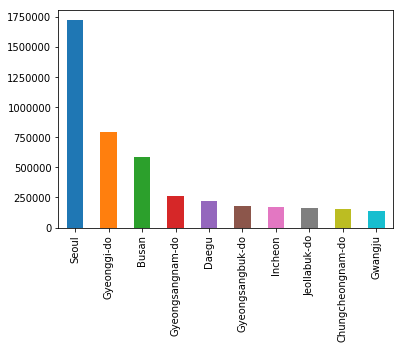

In [21]:
#Top ten city's customer
Client_Behavior.ZON_NM.value_counts()[:10].plot(kind='bar')

In [80]:
Client_Behavior.describe()

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,SEARCH_CNT
count,4.883504e+06,4.883504e+06,4.883504e+06,4.883504e+06,4.883504e+06,4.883504e+06,4.883504e+06,4.883504e+06
mean,3.373539e+06,5.828175e+06,1.678842e+02,4.613100e+05,2.407074e+02,2.018065e+07,2.165983e+02,1.799235e+00
std,1.939834e+06,3.096174e+06,1.197127e+02,2.418876e+05,3.242695e+02,1.663355e+02,1.329047e+02,2.143253e+00
min,1.400000e+01,7.600000e+01,2.000000e+00,1.000000e+00,1.000000e+00,2.018040e+07,2.000000e+00,1.000000e+00
25%,1.683919e+06,3.269893e+06,7.100000e+01,2.662420e+05,3.500000e+01,2.018051e+07,1.070000e+02,1.000000e+00
50%,3.385580e+06,6.077698e+06,1.370000e+02,4.700740e+05,1.200000e+02,2.018062e+07,1.880000e+02,1.000000e+00
75%,5.087888e+06,8.438784e+06,2.410000e+02,6.807770e+05,3.170000e+02,2.018081e+07,3.070000e+02,2.000000e+00
max,6.592551e+06,1.097794e+07,5.000000e+02,8.476520e+05,5.980000e+03,2.018093e+07,4.990000e+02,6.300000e+01


# Data 정의

In [93]:
data = Client_Behavior

In [94]:
data.head()

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,SESS_SEQ,SESS_DT,...,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM,PD_NM,CLAC1_NM,CLAC2_NM,CLAC3_NM,KWD_NM,SEARCH_CNT
0,4148106,6662803,94,570603,색상:WHT0_WHT0-(WHITE)|사이즈:115 / 1개,데상트,"39,000",1,55,20180611,...,"1,371",mobile,Seoul,Seoul,[데상트] 스포츠베이직 빅로고 티셔츠 - DMGR_DMELANGE / 115,스포츠패션,남성일반스포츠의류,남성스포츠티셔츠,라코스떼 남성티셔츠,2
1,4148106,6662803,94,529438,색상:선1)001(화이트)|사이즈:006(110) / 1개,라코스테(의류),"88,000",1,55,20180611,...,"1,371",mobile,Seoul,Seoul,남성 빅크록 라운드 반팔 티셔츠TH670E-18B_6컬러 - 선1)001(화이트) ...,남성의류,남성의류상의,남성티셔츠,라코스떼 남성티셔츠,2
2,5298612,4443505,129,570603,색상:BLK0_(BLK0)BLACK|사이즈:105 / 1개,데상트,"39,000",1,710,20180717,...,"1,199",mobile,Busan,Busan,[데상트] 스포츠베이직 빅로고 티셔츠 - DMGR_DMELANGE / 115,스포츠패션,남성일반스포츠의류,남성스포츠티셔츠,남성반바지,1
3,5298612,4443505,129,570603,색상:BLK0_(BLK0)BLACK|사이즈:105 / 1개,데상트,"39,000",1,710,20180717,...,"1,199",mobile,Busan,Busan,[데상트] 스포츠베이직 빅로고 티셔츠 - DMGR_DMELANGE / 115,스포츠패션,남성일반스포츠의류,남성스포츠티셔츠,데상트 반팔,1
4,5639922,5456967,91,570603,색상:BLK0_(BLK0)BLACK|사이즈:95 / 1개,데상트,"39,000",1,1409,20180701,...,"1,598",mobile,Gyeongsangbuk-do,Chilgok-gun,[데상트] 스포츠베이직 빅로고 티셔츠 - DMGR_DMELANGE / 115,스포츠패션,남성일반스포츠의류,남성스포츠티셔츠,르꼬끄반팔,1


In [95]:
data.dtypes

CLNT_ID              int64
SESS_ID              int64
HITS_SEQ             int64
PD_C                 int64
PD_ADD_NM           object
PD_BRA_NM           object
PD_BUY_AM           object
PD_BUY_CT           object
SESS_SEQ             int64
SESS_DT              int64
TOT_PAG_VIEW_CT    float64
TOT_SESS_HR_V       object
DVC_CTG_NM          object
ZON_NM              object
CITY_NM             object
PD_NM               object
CLAC1_NM            object
CLAC2_NM            object
CLAC3_NM            object
KWD_NM              object
SEARCH_CNT           int64
dtype: object

In [66]:
# converting dtypes using astype 
data["PD_BUY_CT"]= data["PD_BUY_CT"].astype(float) 

In [71]:
data.head()

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,SESS_SEQ,SESS_DT,...,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM,PD_NM,CLAC1_NM,CLAC2_NM,CLAC3_NM,KWD_NM,SEARCH_CNT
0,4148106,6662803,94,570603,색상:WHT0_WHT0-(WHITE)|사이즈:115 / 1개,데상트,"39,000",NaN,55,20180611,...,"1,371",mobile,Seoul,Seoul,[데상트] 스포츠베이직 빅로고 티셔츠 - DMGR_DMELANGE / 115,스포츠패션,남성일반스포츠의류,남성스포츠티셔츠,라코스떼 남성티셔츠,2
1,4148106,6662803,94,529438,색상:선1)001(화이트)|사이즈:006(110) / 1개,라코스테(의류),"88,000",NaN,55,20180611,...,"1,371",mobile,Seoul,Seoul,남성 빅크록 라운드 반팔 티셔츠TH670E-18B_6컬러 - 선1)001(화이트) ...,남성의류,남성의류상의,남성티셔츠,라코스떼 남성티셔츠,2
2,5298612,4443505,129,570603,색상:BLK0_(BLK0)BLACK|사이즈:105 / 1개,데상트,"39,000",1.0,710,20180717,...,"1,199",mobile,Busan,Busan,[데상트] 스포츠베이직 빅로고 티셔츠 - DMGR_DMELANGE / 115,스포츠패션,남성일반스포츠의류,남성스포츠티셔츠,남성반바지,1
3,5298612,4443505,129,570603,색상:BLK0_(BLK0)BLACK|사이즈:105 / 1개,데상트,"39,000",1.0,710,20180717,...,"1,199",mobile,Busan,Busan,[데상트] 스포츠베이직 빅로고 티셔츠 - DMGR_DMELANGE / 115,스포츠패션,남성일반스포츠의류,남성스포츠티셔츠,데상트 반팔,1
4,5639922,5456967,91,570603,색상:BLK0_(BLK0)BLACK|사이즈:95 / 1개,데상트,"39,000",1.0,1409,20180701,...,"1,598",mobile,Gyeongsangbuk-do,Chilgok-gun,[데상트] 스포츠베이직 빅로고 티셔츠 - DMGR_DMELANGE / 115,스포츠패션,남성일반스포츠의류,남성스포츠티셔츠,르꼬끄반팔,1


In [62]:
data.head(1)

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,SESS_SEQ,SESS_DT,...,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM,PD_NM,CLAC1_NM,CLAC2_NM,CLAC3_NM,KWD_NM,SEARCH_CNT
0,4148106,6662803,94,570603,색상:WHT0_WHT0-(WHITE)|사이즈:115 / 1개,데상트,"39,000",1,55,20180611,...,"1,371",mobile,Seoul,Seoul,[데상트] 스포츠베이직 빅로고 티셔츠 - DMGR_DMELANGE / 115,스포츠패션,남성일반스포츠의류,남성스포츠티셔츠,라코스떼 남성티셔츠,2


In [63]:
data.tail(1)

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,SESS_SEQ,SESS_DT,...,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM,PD_NM,CLAC1_NM,CLAC2_NM,CLAC3_NM,KWD_NM,SEARCH_CNT
4883503,1835621,3242152,60,250634,품번:1003490_메탈릭실버|사이즈:41 / 1개,버켄스탁,"39,900",1,36,20180806,...,754,mobile,Seoul,Seoul,버켄스탁 남성 레귤러 아리조나 에바 슬리퍼 메탈릭실버 1003490 - 100349...,스포츠패션,남성스포츠화,남성스포츠샌들/슬리퍼,버켄스탁 아리조나,1


In [68]:
Client_Behavior.groupby('CLNT_ID')['PD_BUY_CT'].mean().head()

CLNT_ID
14   NaN
56   NaN
58   NaN
63   NaN
68   NaN
Name: PD_BUY_CT, dtype: float64